## Staggered scheme with force relaxation

A staggered scheme is a weakly coupled scheme in which the fluid and solid subproblems are solved only once, as illustrated in the following figure.

![](./figures/staggered-scheme-temporalflow.png)

We can devise different staggered schemes by choosing any of the parameters - force, displacement, velocity and acceleration - for prediction-correction steps. Here, we choose force as the predictor.

We denote the current time step as $t_{n+1}$, and previous time steps as $t_{n}$ and $t_{n-1}$.

By denoting the force on the solid at the previous time steps as $f_{n}$ and $f_{n-1}$, we can predict the force on the solid using either first-order ($f^{P1}$) or second-order ($f^{P2}$) approximation as
\begin{align}
f^{P1} &= f_n, \\
%
f^{P2} &= 2 \, f_n - f_{n-1}.
\end{align}

Higher-order approximations are also possible, but with higher-order approximations result in lower stability limits. Therefore, they are not worth the effort.

We can generalise the force-predictor as
\begin{align}
f^{P} = p_1 \, f_n + p_2 \, f_{n-1}
\end{align}
where $p_1$ and $p_2$ are selected depending on the interest.


The key steps in the staggered scheme are:

* Predict force on the solid: $f^P = \psi_1(f_{n}, f_{n-1})$
* Solve the solid problem:
    * Compute displacement of the solid: $d_{n+1} = \mathcal{S}(f^P)$
    * Evaluate velocity of the solid: $\dot{d}_{n+1} = \psi_2(d_{n+1}, d_n, \dot{d}_n, \ddot{d}_n)$
    * Evaluate acceleration of the solid: $\ddot{d}_{n+1} = \psi_3(d_{n+1}, d_n, \dot{d}_n, \ddot{d}_n)$
* Solve the fluid problem:
    * Set velocity BC for the fluid problem: $v^f_{n+1} = \dot{d}_{n+1}$
    * Compute from on the solid: $f^* = \mathcal{F}(v^f_{n+1})$
* Correct the force on the solid: $f^s_{n+1} = - \beta f^* + (1-\beta) f^P$

Here, $\beta$ is the relaxation parameter. It's range is between 0 and 1, excluding both, i.e., $\beta \in (0,1)$. $\beta$ dictates the stability of the scheme; it depends on the parameter $\alpha$ (or mass ratio $m^r$).



## Staggered scheme with backward Euler scheme and force predictor

Using the backward Euler time integration scheme and force predictor, we can write the equations for the staggered scheme as

\begin{align} 
f^P_{n+1} & = p_1 \, f_n + p_2 \, f_{n-1} \\
f^s_{n+1} &= f^{s^P}_{n+1} \\
\alpha \, \ddot{d}^s_{n+1} + \omega^2 \, d^s_{n+1} &= f^{s^P}_{n+1} \\
(1-\alpha) \, \dot{v}^f_{n+1} + 2 \, \xi \, \omega \, v^f_{n+1} &= f^f_{n+1} \\
f^f_{n+1} &= f^{f^*}_{n+1} \\
f^s_{n+1} &= - \beta f^{f^*}_{n+1} + (1-\beta) f^{s^P}_{n+1} \\
\dot{d}^s_{n+1} &= v^f_{n+1} \\
f^s_{n+1} + f^f_{n+1} &= 0
\end{align}

With $\dot{d}^s_n = v^f_n$, $\dot{d}^s_{n+1} = v^f_{n+1}$ and $f^s_{n+1} = - f^f_{n+1} = f_{n+1}$, the system of equations (\ref{eqs-mono-BE}) can be written in the matrix-vector form as,
\begin{align}
\begin{Bmatrix}
d^s_{n+1} \\ \dot{d}^s_{n+1} \Delta t \\ f_{n+1} \Delta t^2 \\ f_{n} \Delta t^2
\end{Bmatrix}
=
\begin{bmatrix}
\\
\\
\mathbf{A}_{\text{stag-BE}} \\
\\
\end{bmatrix}
\begin{Bmatrix}
d^s_{n} \\ \dot{d}^s_{n} \Delta t \\ f_{n} \Delta t^2 \\ f_{n-1} \Delta t^2
\end{Bmatrix}
\end{align}

The amplification matrix for the undamped case ($\xi=0$) is given as
\begin{align}
\mathbf{A}_{\text{stag-BE}} =
\frac{1}{\alpha + \omega^2 \, \Delta t^2}
\begin{bmatrix}
\alpha   &   \alpha   &   p_1   &    p_2   \\
%
-\omega^2 \, \Delta t^2   &   a   &   p_1   &    p_2   \\
%
\omega^2 \, \Delta t^2 \, \beta \, (1 - \alpha)   &   \omega^2 \, \Delta t^2 \, \beta \, (1 - \alpha)   &    p_1 \, Z   &   p_2 \, Z  \\
%
0   &   0   &    \alpha + \omega^2 \, \Delta t^2    &     0
\end{bmatrix}
\end{align}
where
\begin{align}
Z = (\beta \, (\alpha-1) - (\alpha+\omega^2 \Delta t^2) \, (\beta-1))
\end{align}

As we can observe, the matrix is a function of $\alpha = \alpha(m^r)$. Note that $\alpha=\frac{m^r}{1+m^r}$.


#### Numerical damping
Numerical damping is very helpful in damping out high frequency modes. Usually, this does not have much effect on FSI problems with rigid bodies for which the number of DOFs is quite small. However, numerical damping plays quite a key role in FSI problems with flexible structures, as flexible structures have quite a few DOFs.


### Scheme with $f^{P1}$

#### Accuracy
The leading error terms are
\begin{align}
\mathcal{O}(\Delta t)          &= i \, \omega^3 \, \Big( 1 - \frac{\beta}{\alpha} - \frac{1}{\alpha} \Big)
\end{align}

Therefore, the scheme first order accurate for any $\beta \in (0,1)$. However, due to the $\frac{1}{\alpha}$ term, the error starts to increase with decreasing $\alpha$.


#### Stability
The stability condition is: $0 < \beta \leq 2 \, \alpha$. Therefore, its stability depends on $\alpha$.

Without relaxation, i.e., $\beta=1$, we have
\begin{align}
\alpha &\geq 0.5, \quad \text{or} \quad m^r \geq 1.
\end{align}

#### Numerical damping
The spectral radius at an infinite time step is
\begin{align}
\lim_{\Delta t \rightarrow \infty} \rho(\mathbf{A}) = 1-\beta
\end{align}

Overall, for $\beta=1$, the scheme is first-order accurate and possesses highest possible numerical damping. But for $\beta \neq 1$, the scheme is still first-order accurate but loses numerical damping capability.


### Scheme with $f^{P2}$

#### Accuracy
The leading error terms are
\begin{align}
\mathcal{O}(\Delta t)          &= i \, \omega^3 \, \frac{\beta}{\alpha}
\end{align}

Therefore, the scheme first order accurate for any $\beta \in (0,1)$. If we choose $\beta=\alpha$, then the error terms becomes constant. Therefore, the error is much lower than that of $f^{P1}$.


#### Stability
The stability condition is: $0 < \beta \leq \frac{4}{3} \, \alpha$. Therefore, its stability depends on $\alpha$.

Without relaxation, i.e., $\beta=1$, we have
\begin{align}
\alpha &\geq 0.75, \quad \text{or} \quad m^r \geq 3.
\end{align}

#### Numerical damping
The spectral radius at an infinite time step is
\begin{align}
\lim_{\Delta t \rightarrow \infty} \rho(\mathbf{A}) = \sqrt{1-\beta}
\end{align}

Since $(1-\beta) < \sqrt{1-\beta}$ for $0 < \beta < 1$, the $f^{P1}$ scheme has higher numerical damping  (lower spectral radius) than that of $f^{P2}$. That is, in other words, higher-order schemes possess lower numerical damping.


Overall, the scheme is first-order accurate for any for $\beta$ and possesses highest possible numerical damping $\beta=1$. For $\beta \neq 1$, the scheme is still first-order accurate but loses numerical damping capability.

### Observations
* Without relaxation the the type of problems that can be solved with the staggered schemes are limited.
* $f^{P1}$ scheme has a better stability limit compared to $f^{P2}$, while $f^{P2}$ is more accurate than $f^{P1}$.
* Relaxation parameter $\beta$ can be chosen simply as $\alpha$ as it readily satisfies the stability limit for both the schemes.

### Spectral radii plots
We can plot the spectral radius for different values of $m^r$ to assess the spectral radius.

The function call is
**specRadPred = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, predictor_type, logtimestep)**

The inputs are mass ($m$), damping coefficient ($c$), stiffness ($k$), mass ratio ($m^r$), predictor type (*predictor_type*) and an array of log10 of time steps. The output is an array of spectral radii values.

### Mass ratio $m^r=3$ without relaxation ($\beta=1$)

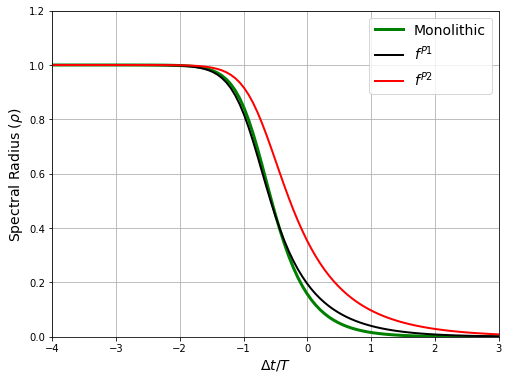

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

logtimestep = np.linspace(-4, 3, 101)

mr = 3.0;                        # mass ratio

beta  = 1.0;

specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRad_fP1 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRad_fP2 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono, 'g-',  linewidth=3, label="Monolithic")
plt.plot(logtimestep, specRad_fP1, 'k-',  linewidth=2, label=r"$f^{P1}$")
plt.plot(logtimestep, specRad_fP2, 'r-',  linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.grid()
plt.legend(fontsize=14)
plt.show()

As we can notice from the plot, for $m^r=3$ both schemes are stable without relaxation ($\beta=1$). Since spectral radius approaches zero as $\Delta t \rightarrow \infty$, both schemes possess highest numerical damping.

### Mass ratio $m^r=1$ without relaxation $\beta=1$

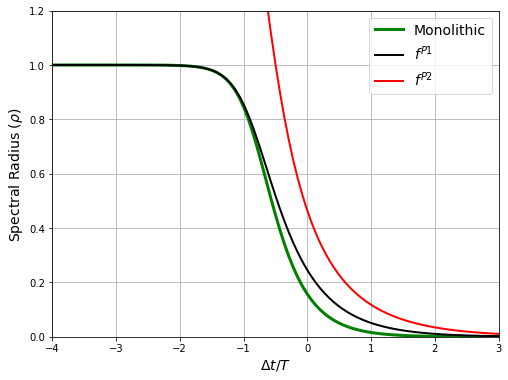

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

logtimestep = np.linspace(-4, 3, 101)

mr = 1.0;                        # mass ratio

beta  = 1.0;

specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRad_fP1 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRad_fP2 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono, 'g-',  linewidth=3, label="Monolithic")
plt.plot(logtimestep, specRad_fP1, 'k-',  linewidth=2, label=r"$f^{P1}$")
plt.plot(logtimestep, specRad_fP2, 'r-',  linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.grid()
plt.legend(fontsize=14)
plt.show()

For $m^r=1$ and without relaxation ($\beta=1$), $f^{P1}$ is stable and $f{^P2}$ is not.

For values $m^r < 1$, both schemes are unstable. We can improve the stability by adding relaxation but at the expense of numerical damping.

### Mass ratio $m^r=1$ with relaxation ($\beta=\alpha$)

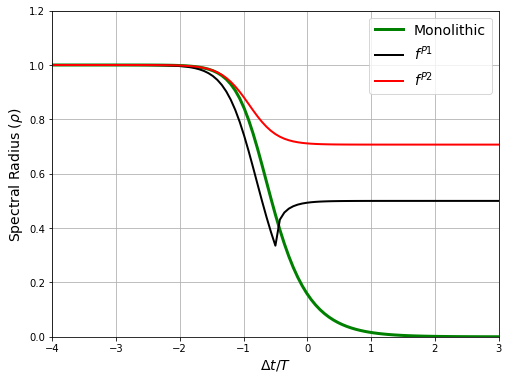

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

logtimestep = np.linspace(-4, 3, 101)

mr = 1.0;                        # mass ratio

alpha = mr/(1.0+mr);
beta = alpha;

specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRad_fP1 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRad_fP2 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono, 'g-',  linewidth=3, label="Monolithic")
plt.plot(logtimestep, specRad_fP1, 'k-',  linewidth=2, label=r"$f^{P1}$")
plt.plot(logtimestep, specRad_fP2, 'r-',  linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.grid()
plt.legend(fontsize=14)
plt.show()

We can notice from the above graph that $f^{P2}$ is now stable. We can also observe that the spectral radii values for both schemes have increased, resulting in reduced numerical damping.

### Mass ratio $m^r=0.1$  with relaxation ($\beta=\alpha$)

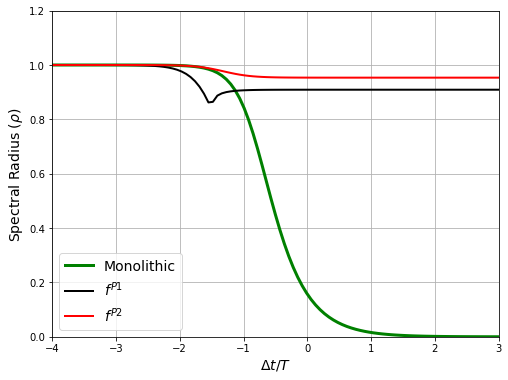

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

logtimestep = np.linspace(-4, 3, 101)

mr = 0.1;                        # mass ratio

alpha = mr/(1.0+mr);
beta = alpha;

specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRadPred1 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRadPred2 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono,  'g-',  linewidth=3, label="Monolithic")
plt.plot(logtimestep, specRadPred1, 'k-',  linewidth=2, label=r"$f^{P1}$")
plt.plot(logtimestep, specRadPred2, 'r-',  linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.grid()
plt.legend(fontsize=14)
plt.show()

Further reducing $m^r$ is reduced to 0.1 increases the specral radii of the schemes further. In other words, the numerical damping is further reduced. Note, however, that the schemes are still stable as $\rho leq 1$.

### Mass ratio $m^r=0.01$

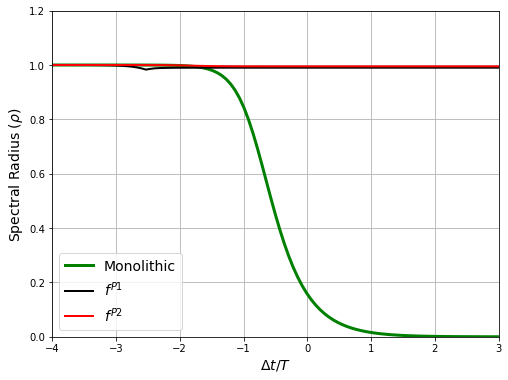

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

logtimestep = np.linspace(-4, 3, 101)

mr = 0.01;                        # mass ratio

alpha = mr/(1.0+mr);
beta = alpha;

specRadMono = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)

specRadPred1 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 1, beta, logtimestep)
specRadPred2 = spectralRadius_staggered_forcerelaxation_BE(m, c, k, mr, 2, beta, logtimestep)

plt.figure(figsize=(8,6))

plt.plot(logtimestep, specRadMono,  'g-',  linewidth=3, label="Monolithic")
plt.plot(logtimestep, specRadPred1, 'k-',  linewidth=2, label=r"$f^{P1}$")
plt.plot(logtimestep, specRadPred2, 'r-',  linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(logtimestep), max(logtimestep)])
plt.ylim([0.0, 1.2])
plt.grid()
plt.legend(fontsize=14)
plt.show()

For $m^r=0.01$, and for further lower values of $m^r$, there is almost no numerical damping for both schemes. Note, however, that the schemes are still stable as $\rho leq 1$.

### Numerical solutions using the staggered scheme

### Solutions with $m^r=1$ with different predictors

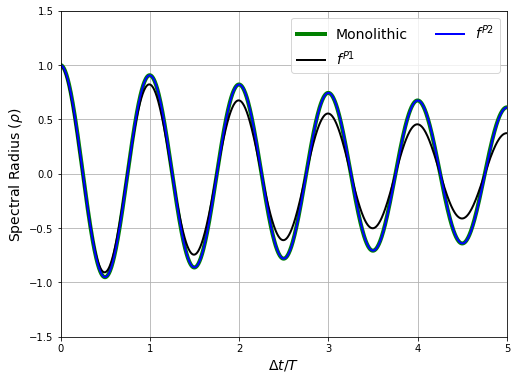

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 5*T+dt, dt)

mr = 1.0;                        # mass ratio

alpha = mr/(1.0+mr);
beta  = alpha
#beta  = 1.0                 # relaxation parameter


# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

# solution with staggered schemes
disp_fP1, velo_fP1 = solution_staggered_forcerelaxation_BE(m, c, k, mr, 1, beta, timesteparray)
disp_fP2, velo_fP2 = solution_staggered_forcerelaxation_BE(m, c, k, mr, 2, beta, timesteparray)

plt.figure(figsize=(8,6))

plt.plot(timesteparray, dispMono,  'g', linewidth=4, label="Monolithic")
plt.plot(timesteparray, disp_fP1,  'k', linewidth=2, label=r"$f^{P1}$")
plt.plot(timesteparray, disp_fP2,  'b', linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
plt.ylim([-1.5, 1.5])
plt.legend(ncol=2,fontsize=14)
plt.grid()
plt.show()

### Solutions with $m^r=0.1$ with different predictors

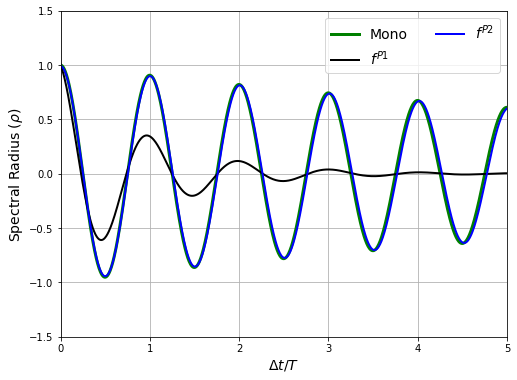

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 5*T+dt, dt)

mr = 0.10;                       # mass ratio

alpha = mr/(1.0+mr);
beta  = alpha
#beta  = 1.0                 # relaxation parameter

# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

# solution with staggered scheme
#dispNumfP1, veloNumfP1 = solution_staggered_forcerelaxation_BE(m, c, k, mr, predType, betafactor, timesteparray)

dispNumfP1, veloNumfP1 = solution_staggered_forcerelaxation_BE(m, c, k, mr, 1, beta, timesteparray)
dispNumfP2, veloNumfP2 = solution_staggered_forcerelaxation_BE(m, c, k, mr, 2, beta, timesteparray)

plt.figure(figsize=(8,6))

plt.plot(timesteparray, dispMono,  'g', linewidth=3, label="Mono")
plt.plot(timesteparray, dispNumfP1,'k', linewidth=2, label=r"$f^{P1}$")
plt.plot(timesteparray, dispNumfP2,'b', linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
plt.ylim([-1.5, 1.5])
plt.legend(ncol=2,fontsize=14)
plt.grid()
plt.show()

As shown, $f^{P1}$ scheme performs poorly when compared with $f^{P2}$ scheme. The higher numerical damping property of $f^{P1}$ is clear in the response. The accuracy of $f^{P1}$ can be improved by decreasing the time step size.

### Solutions with $m^r=0.1$ with different predictors and $dt=T/500$

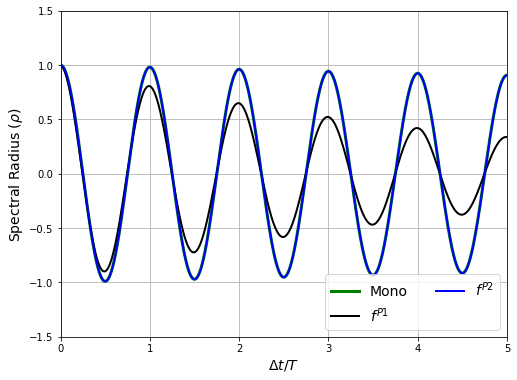

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/1000.0;

timesteparray = np.arange(0.0, 5*T+dt, dt)

mr = 0.10;                       # mass ratio

alpha = mr/(1.0+mr);
beta  = alpha
#beta  = 1.0                 # relaxation parameter

# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

# solution with staggered scheme
dispNumfP1, veloNumfP1 = solution_staggered_forcerelaxation_BE(m, c, k, mr, 1, beta, timesteparray)
dispNumfP2, veloNumfP2 = solution_staggered_forcerelaxation_BE(m, c, k, mr, 2, beta, timesteparray)

plt.figure(figsize=(8,6))

plt.plot(timesteparray, dispMono,  'g', linewidth=3, label="Mono")
plt.plot(timesteparray, dispNumfP1,'k', linewidth=2, label=r"$f^{P1}$")
plt.plot(timesteparray, dispNumfP2,'b', linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
plt.ylim([-1.5, 1.5])
plt.legend(ncol=2,fontsize=14)
plt.grid()
plt.show()

### Instability for $f^{P1}$

Note that for $f^{P1}$ scheme, the stability limit is $0 < \beta < 2 \, \alpha$. So, the solution should diverge for $\beta > 2 \, \alpha$.

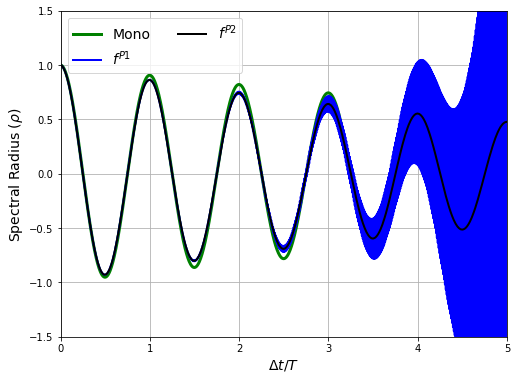

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 5*T+dt, dt)

mr = 1.0;                       # mass ratio

alpha = mr/(1.0+mr);

# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

predType   = 1
beta       = 2.01*alpha;
dispNumfP1, veloNumfP1 = solution_staggered_forcerelaxation_BE(m, c, k, mr, predType, beta, timesteparray)

predType   = 1
beta       = 2.0*alpha;
dispNumfP2, veloNumfP2 = solution_staggered_forcerelaxation_BE(m, c, k, mr, predType, beta, timesteparray)

plt.figure(figsize=(8,6))

plt.plot(timesteparray, dispMono,  'g', linewidth=3, label="Mono")
plt.plot(timesteparray, dispNumfP1,'b', linewidth=2, label=r"$f^{P1}$")
plt.plot(timesteparray, dispNumfP2,'k', linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
plt.ylim([-1.5, 1.5])
plt.legend(ncol=2,fontsize=14)
plt.grid()
plt.show()

As we can see, the solution starts to diverge for $betafactor = 2.01$.

### Instability for $f^{P2}$

Note that for $f^{P2}$ scheme, the stability limit is $0 < \beta < \frac{4}{3} \, \alpha$. So, the solution should diverge for $\beta > \frac{4}{3} \, \alpha$.

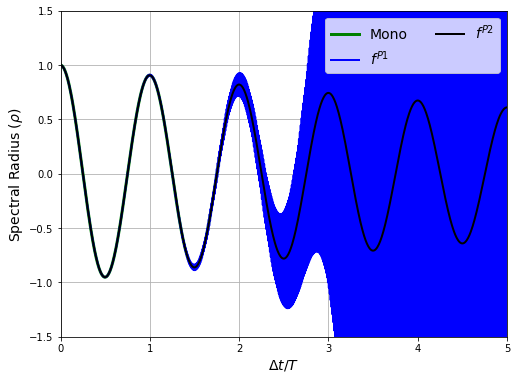

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from utilities_monolithic import *
from utilities_staggered import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 5*T+dt, dt)

mr = 1.0;                       # mass ratio

alpha = mr/(1.0+mr);

# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

predType   = 2
beta       = 1.34*alpha
dispNumfP1, veloNumfP1 = solution_staggered_forcerelaxation_BE(m, c, k, mr, predType, beta, timesteparray)

predType   = 2
beta       = 1.33*alpha
dispNumfP2, veloNumfP2 = solution_staggered_forcerelaxation_BE(m, c, k, mr, predType, beta, timesteparray)

plt.figure(figsize=(8,6))

plt.plot(timesteparray, dispMono,  'g', linewidth=3, label="Mono")
plt.plot(timesteparray, dispNumfP1,'b', linewidth=2, label=r"$f^{P1}$")
plt.plot(timesteparray, dispNumfP2,'k', linewidth=2, label=r"$f^{P2}$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
plt.ylim([-1.5, 1.5])
plt.legend(ncol=2,fontsize=14)
plt.grid()
plt.show()